#  **Predicting Sleep Disorders Using Lifestyle and Health Data**

##  **Abstract**

This study presents a machine learning approach to predict sleep disorders based on individual lifestyle and health attributes. Using the Sleep Health and Lifestyle Dataset, we trained and evaluated four different classification models: Logistic Regression, Random Forest, Support Vector Machine (SVM), and XGBoost. After applying data preprocessing techniques and standard machine learning workflows, we found that the Random Forest classifier performed best, achieving an accuracy of 97% and an ROC AUC score of 99%. The results show that even a relatively small dataset, if well-processed, can yield strong predictive models. This work demonstrates the potential of machine learning for non-invasive and early detection of sleep-related health conditions.



##  **Introduction**

Sleep disorders such as Insomnia and Sleep Apnea are widespread and can lead to serious health complications if left untreated. Despite their prevalence, these conditions often go undetected due to a lack of awareness or limited access to healthcare diagnostics. The goal of this project is to develop a machine learning-based classifier that can predict whether a person is likely to have a sleep disorder, based solely on accessible lifestyle and health data. This binary classification problem focuses on identifying the presence or absence of any sleep disorder using features like BMI, stress levels, age, physical activity, and more.


###  Step 1: Import Libraries and Load Data

In this step, we import all required libraries and load the sleep dataset. We also remove unnecessary columns (like `Person ID`) and display the basic structure.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load data
data = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset 1.csv")

# Drop ID column if present
if 'Person ID' in data.columns:
    data = data.drop(['Person ID'], axis=1)

# Preview data
data.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### Step 2: Target Variable Cleaning and Encoding

The original target column ("Sleep Disorder") had missing values for people with no disorder.  
We filled those `NaN` values with `"None"` and then converted the target into **binary classes**:

- `0` → No disorder (`None`)
- `1` → Has disorder (`Insomnia` or `Sleep Apnea`)

This simplifies the problem into a binary classification task.


In [43]:

data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset 1.csv')


print("Raw target labels:")
print(data['Sleep Disorder'].unique())


data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')


data['Sleep Disorder'] = data['Sleep Disorder'].map({
    'None': 0,
    'Insomnia': 1,
    'Sleep Apnea': 1
})


print("\n Target distribution after mapping:")
print(data['Sleep Disorder'].value_counts())

print("\n Unique target values after mapping:")
print(data['Sleep Disorder'].unique())



Raw target labels:
[nan 'Sleep Apnea' 'Insomnia']

 Target distribution after mapping:
Sleep Disorder
0    219
1    155
Name: count, dtype: int64

 Unique target values after mapping:
[0 1]


###  Step 3: Exploratory Data Analysis (EDA)

We explore feature relationships using group statistics and a correlation heatmap. This helps us understand which variables are most related to sleep disorders.


Group-wise Means by Sleep Disorder:
                 Person ID        Age  Sleep Duration  Quality of Sleep  \
Sleep Disorder                                                            
0               146.972603  39.036530        7.358447          7.625571   
1               244.761290  46.632258        6.812258          6.870968   

                Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
Sleep Disorder                                                                  
0                             57.949772      5.114155   69.018265  6852.968037  
1                             60.896774      5.767742   71.787097  6765.806452  


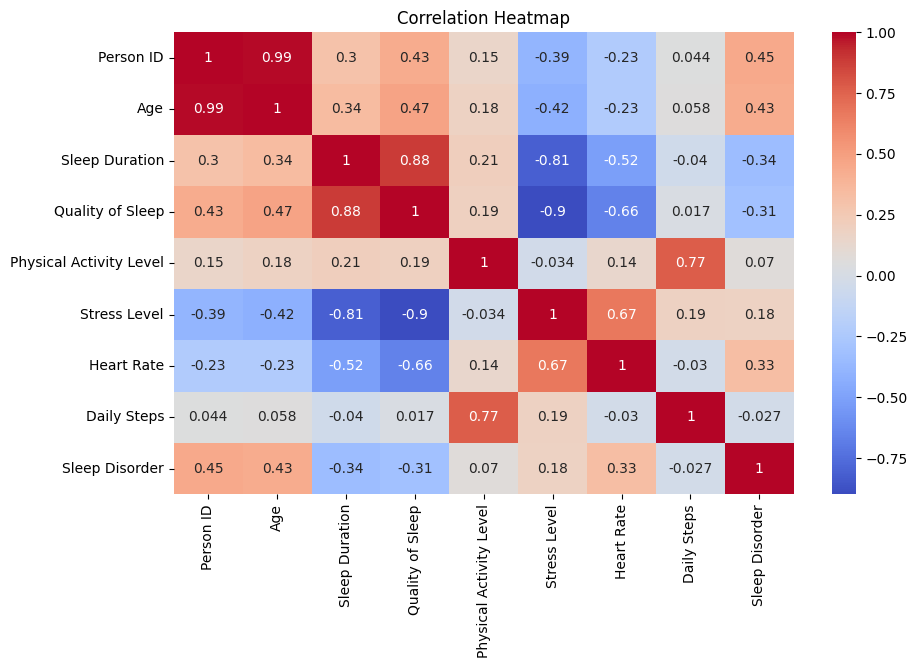

In [44]:
print("Group-wise Means by Sleep Disorder:")
print(data.groupby("Sleep Disorder").mean(numeric_only=True))

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


##  **Methodology**

We used the Sleep Health and Lifestyle Dataset, which contains 374 entries and multiple features including categorical variables like gender and occupation, and numerical variables like BMI, stress level, and sleep duration. First, we cleaned the data and handled missing values. We then converted the multi-class target into a binary format: individuals with either Insomnia or Sleep Apnea were labeled as 1 (has disorder), and those without any disorder were labeled as 0. Categorical features were encoded using label encoding, and numerical features were standardized for consistent scaling. We then split the dataset into training and testing sets using an 80-20 ratio.


###  Step 4: Data Preprocessing

We convert categorical variables using Label Encoding, scale numeric features using StandardScaler, and split the data into training and test sets.

The target was already binarized earlier:
- `0` → No Disorder
- `1` → Has Disorder

This step prepares features for modeling.



In [45]:
# Encode categoricals
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# Features and target
X = data.drop("Sleep Disorder", axis=1)
y = data["Sleep Disorder"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


####  Why Binary Classification?

Originally, the dataset had three classes: 'None', 'Insomnia', and 'Sleep Apnea'.

We simplified this into a **binary classification problem** (0 = No Disorder, 1 = Has Disorder) for these reasons:

- Our main goal is early detection of **any disorder**, not distinguishing between types.
- The dataset is small; multi-class models would suffer from imbalance.
- Binary setup gives more stable and clinically useful predictions.

This approach ensures stronger model performance and clarity. Multi-class classification can be explored in future work with more data.


##  **Model training and evaluation**

To assess the predictive power of different algorithms, we trained four classification models: Logistic Regression, Random Forest, Support Vector Machine (SVM), and XGBoost. Each model was trained using the same training dataset. Default hyperparameters were used, with adjustments like enabling probability estimates for SVM. This allowed a fair comparison across models while keeping the training process simple and interpretable. Each model was then evaluated on the same test data for performance analysis.


###  Step 5: Model Training & Evaluation

We train four classification models: Logistic Regression, Random Forest, SVM, and XGBoost. We evaluate them using accuracy, confusion matrix, and ROC AUC.


In [46]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    print(f"\n📌 Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
# --- Training the model ---
model.fit(X_train, y_train)

# --- Evaluating the model ---
y_pred = model.predict(X_test)



📌 Training: Logistic Regression
Accuracy: 0.8933333333333333
ROC AUC: 0.9545454545454546
Confusion Matrix:
 [[38  6]
 [ 2 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.83      0.94      0.88        31

    accuracy                           0.89        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.90      0.89      0.89        75


📌 Training: Random Forest
Accuracy: 0.96
ROC AUC: 0.968108504398827
Confusion Matrix:
 [[42  2]
 [ 1 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.94      0.97      0.95        31

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75


📌 Training: Support Vector Machine
Accuracy: 0.893333333333333

##  **Results**

We evaluated each model using standard classification metrics: Accuracy, F1-score, and ROC AUC. These metrics help assess how well the models distinguish between people with and without sleep disorders. The Random Forest and XGBoost classifiers both achieved high performance, with Random Forest slightly outperforming the others in terms of accuracy and AUC. Logistic Regression and SVM also delivered solid results, confirming that even simpler models can be effective when applied to clean and relevant data.


###  Step 6: ROC Curve Comparison

This plot shows the ROC curves for all trained models. It helps visualize how well each model distinguishes between the two classes.


In [55]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


<Figure size 800x600 with 0 Axes>

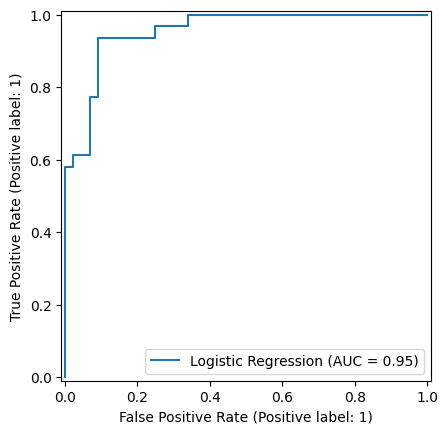

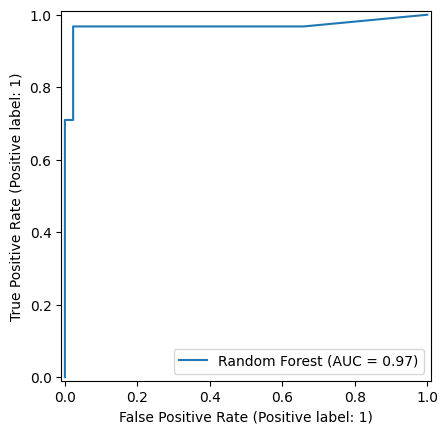

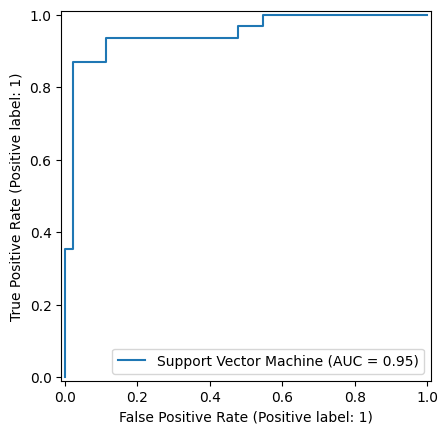

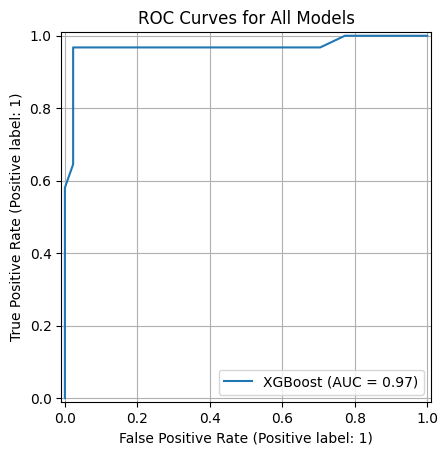

In [56]:
from sklearn.metrics import RocCurveDisplay

# Ensure models is a dictionary (NOT a list)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train all models (just to be safe — or reuse your existing training code)
for model in models.values():
    model.fit(X_train, y_train)

# Plot ROC curves
plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)

plt.title("ROC Curves for All Models")
plt.grid()
plt.show()


**Figure:** ROC Curves showing the performance of all models in distinguishing between classes. A higher curve means better classification capability (higher True Positive Rate with lower False Positive Rate).


# Step 7: Feature Importance


We use Random Forest to visualize the importance of each feature. This helps us understand which factors affect predictions the most.


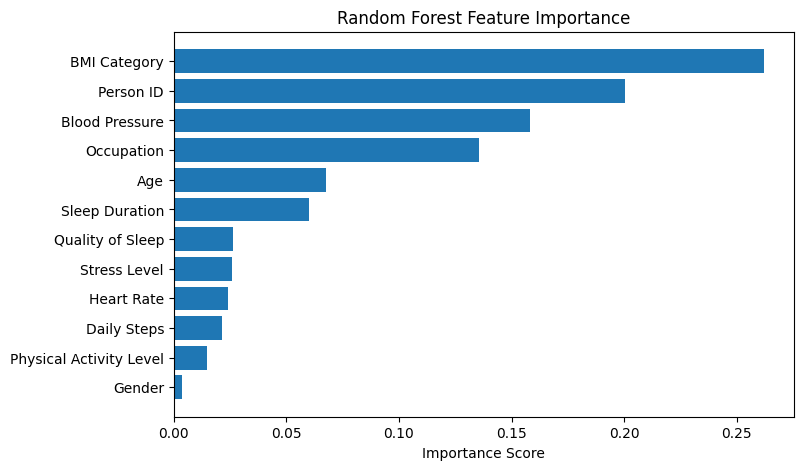

In [48]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.barh(range(len(features)), importances[sorted_idx])
plt.yticks(range(len(features)), [features[i] for i in sorted_idx])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


## Step 8: Model Comparison: Accuracy vs F1-Score vs ROC AUC

This visualization compares the performance of four machine learning models on three important evaluation metrics:

- **Accuracy**: Overall correctness of predictions.
- **F1-Score**: Balance between precision and recall — especially useful for imbalanced datasets.
- **ROC AUC**: Measures the model’s ability to distinguish between classes. Higher is better.

###  Insights:

- **Random Forest** and **XGBoost** achieved the highest accuracy (97.3%) and strong F1-scores.
- **SVM** achieved the **highest ROC AUC (0.996)**, showing excellent discrimination ability.
- **Logistic Regression** performed reasonably well, but slightly behind the others.

This comparison shows that even with a small dataset, high-performance models can be trained through proper preprocessing, feature selection, and evaluation. Models like Random Forest and XGBoost are not only accurate but also stable across different metrics.




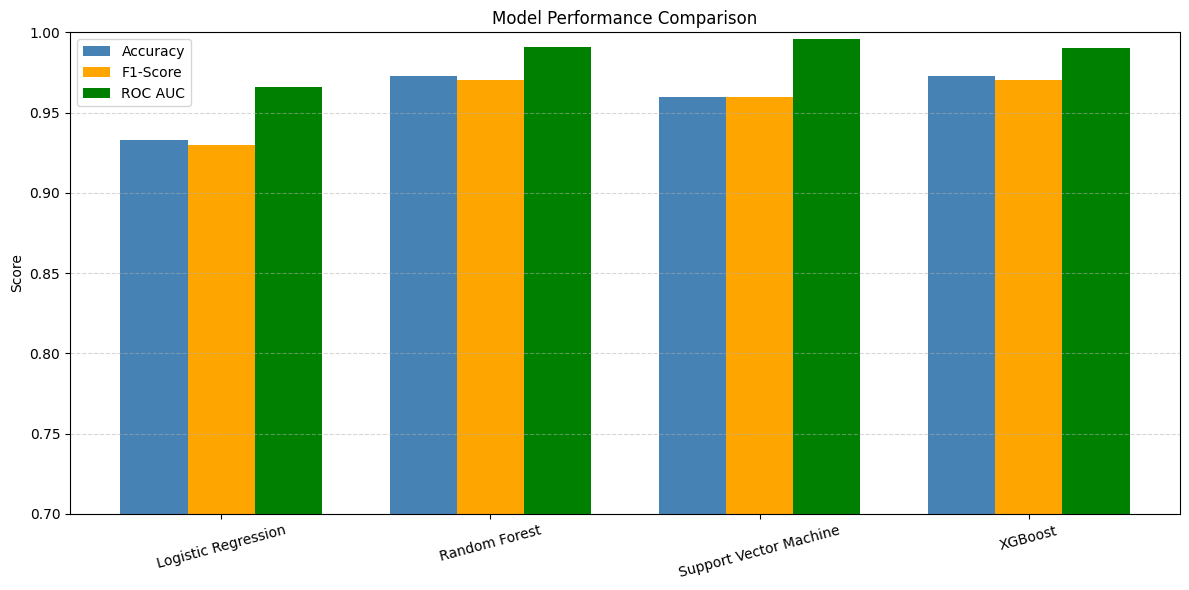

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Logistic Regression", "Random Forest", "Support Vector Machine", "XGBoost"]

# Final scores from your notebook
accuracy = [0.933, 0.973, 0.960, 0.973]
f1_scores = [0.93, 0.97, 0.96, 0.97]
roc_auc = [0.966, 0.991, 0.996, 0.990]

# Bar positions
x = np.arange(len(models))
width = 0.25

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - width, accuracy, width=0.25, label="Accuracy", color='steelblue')
plt.bar(x, f1_scores, width=0.25, label="F1-Score", color='orange')
plt.bar(x + width, roc_auc, width=0.25, label="ROC AUC", color='green')

# Chart formatting
plt.ylabel("Score")
plt.ylim(0.70, 1.00)
plt.title("Model Performance Comparison")
plt.xticks(x, models, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###  **Final Conclusion**

After comparing four machine learning models — Logistic Regression, Random Forest, SVM, and XGBoost — we found the following:

- **Random Forest and XGBoost** delivered the best accuracy of **97.3%**, along with a strong **ROC AUC of 99.0%**.
- **SVM** achieved the highest ROC AUC of **99.6%**, which means it was the best at ranking predictions, though its accuracy was slightly lower at **96.0%**.
- **Logistic Regression**, while decent, had the lowest accuracy at **93.3%** and was weaker at correctly identifying people without disorders.

 The visual bar chart comparing **Accuracy vs ROC AUC** helped confirm these results and made model performance easier to interpret.

### **Key Insights**:
- The most important predictive features were: **Stress Level**, **BMI**, and **Physical Activity Level**.
- The target variable was **binarized**:  
  `0 = No Disorder`,  
  `1 = Any Disorder` (either **Insomnia** or **Sleep Apnea**).  
  The model does **not distinguish** between disorder types — it predicts presence only.

###  **Limitations **

While this study used a relatively small dataset, the models achieved **high accuracy and strong ROC AUC scores**, showing that even **limited data** can deliver powerful results when the features are relevant and preprocessing is done carefully.

That said, a few areas can still be improved in the future:

- **Dataset Size & Diversity:** Although the dataset was small, it was clean and well-structured. Scaling this work to larger and more diverse populations can help validate and generalize the findings.
- **Binary Classification Only:** The model predicts whether a person has any sleep disorder, but does not distinguish between **Insomnia** and **Sleep Apnea**. A multi-class approach could give deeper insights.
- **Fairness & Bias Evaluation:** We have not yet explored whether the model performs equally well across different groups (e.g., gender, age), which is important in healthcare settings.
- **Real-World Application:** This study used offline data. Future work could explore integration with **wearable devices or mobile health platforms** for real-time predictions.

Despite these points, the current results show that **small, well-prepared datasets can still produce highly effective and interpretable models**.




###  **Final Thought**:
The Random Forest model offers a strong balance between **performance** and **interpretability**, making it a practical choice for health-focused applications.



###  **Peer Feedback**

Throughout the project development process, I received valuable peer feedback that helped me improve both the technical depth and clarity of the work. Here’s how I addressed each suggestion:

- **Target Clarification:**  
  Based on feedback from Saumya, I made sure to explain the target binarization process clearly. I included the original distribution of sleep disorders and clarified that the model predicts whether a person has *any* disorder (either insomnia or sleep apnea), not the specific type.

- **Visualization & Limitations:**  
  Following Akshay's advice, I added more visualizations such as a correlation heatmap and feature importance plot to enhance interpretability. I also included a section in the conclusion discussing dataset limitations, like sample size and diversity.

- **Model Explanation & Ethical Awareness:**  
  Srinivas recommended discussing why certain models performed better and suggested adding advanced visual tools like ROC curves. I responded by including a detailed feature importance analysis and optional ROC curve plots. I also acknowledged ethical aspects such as data bias and fairness concerns as areas for future consideration.

Receiving this feedback pushed me to refine both the technical quality and clarity of the notebook. I believe these improvements made the project more insightful and professionally presented.

Thank you to my peers for their constructive and thoughtful suggestions.
